In [5]:
! python3 -m pip install 'scipy<1.10.0,>=1.6.0' 'urllib3<2.0' matplotlib 'numpy<1.23' 'tensorflow<2.16' --user --force-reinstall

  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other require

In [7]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
! python3 -m pip install  'tensorflow<2.16' --user --force-reinstall

  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.12.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cac

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
print(tf.__version__)

2.15.1


In [10]:
# a sinosoidal curve
def sinusoid(x, A, f, p):
    return A*np.sin(f * x + p)

In [11]:
# sinsoidal data with scatter
def generate_data(xmin=0.0, xmax=10.0, A=1.0, f=2.0, p=1.0, s=0.25, n=100):
    x = np.asarray(np.random.uniform(low=xmin, high=xmax, size=n),dtype=np.float32)
    y = np.asarray(sinusoid(x, A, f, p) + s*np.random.randn(n), dtype=np.float32)
    
    y_err = np.full(n,s,dtype=np.float32)
    
    return x,y,y_err

In [12]:
x, y, y_err = generate_data()

In [13]:
plt.style.use("./astr19_matplotlib_defaults.txt")

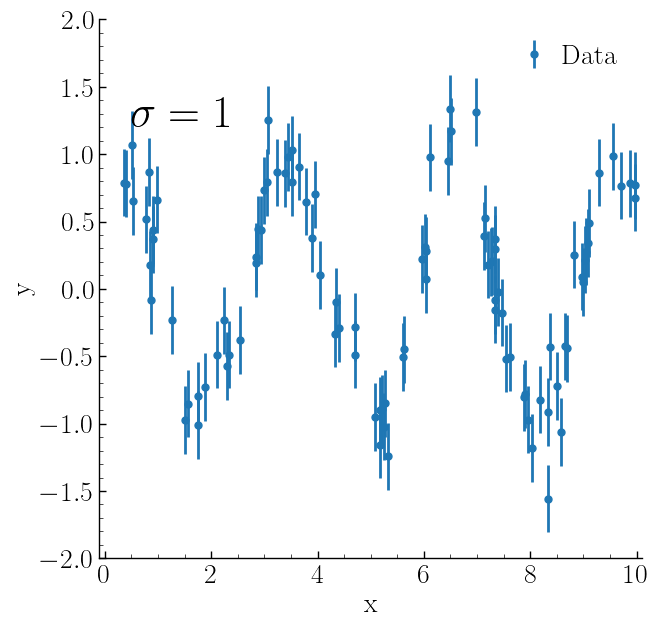

In [15]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = True
f,ax = plt.subplots(1,1,figsize=(7,7))

for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
    
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
    
ax.errorbar(x,y,y_err,fmt='o',label='Data')

ax.set_xlim([-0.1,10.1])
ax.set_ylim([-2.,2])

ax.text(0.5,1.2,r'$\sigma = 1$', color='0', fontsize=32)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

plt.legend(frameon=False,fontsize=20,handletextpad=0)

In [16]:
A_init = 2.0
A_fit = tf.Variable(A_init, name='amplitude')

f_init = 2.0
f_fit = tf.Variable(f_init, name='frequency')

p_init = 0.5
p_fit = tf.Variable(p_init, name='phase')

In [17]:
@tf.function
def sinusoidal_model(x):
    return A_fit*tf.math.sin(f_fit*x + p_fit)

In [23]:
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true, y_pred)

In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [26]:
epochs = 5000
display_step = 1000

for epoch in range(epochs):
    
    if((epoch%display_step)==0):
        pred = sinusoidal_model(x)
        loss = mse(pred,y)
        
        print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}")
        
    with tf.GradientTape() as g:
        pred = sinusoidal_model(x)
        loss = mse(y,pred)
        
    gradients = g.gradient(loss, [A_fit, f_fit, p_fit])
    
    optimizer.apply_gradients(zip(gradients,[A_fit, f_fit, p_fit]))
    
print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}")
print("Done!")



Epoch 0 | Loss 0.05317224934697151, A: 0.9692480564117432 f: 2.002866506576538 p: 0.9537730813026428
Epoch 1000 | Loss 0.05317224562168121, A: 0.9692478775978088 f: 2.002866506576538 p: 0.9537720680236816
Epoch 2000 | Loss 0.05317225307226181, A: 0.9692478775978088 f: 2.0028669834136963 p: 0.953772246837616
Epoch 3000 | Loss 0.053172267973423004, A: 0.9692478179931641 f: 2.002866506576538 p: 0.9537721276283264
Epoch 4000 | Loss 0.053172316402196884, A: 0.9692474007606506 f: 2.002936601638794 p: 0.953826367855072
Epoch 4999 | Loss 0.05317229777574539, A: 0.9692469239234924 f: 2.002913475036621 p: 0.9538134336471558
Done!


In [27]:
x_model = np.sort(x)
y_model = sinusoid(x_model, A_fit, f_fit, p_fit)

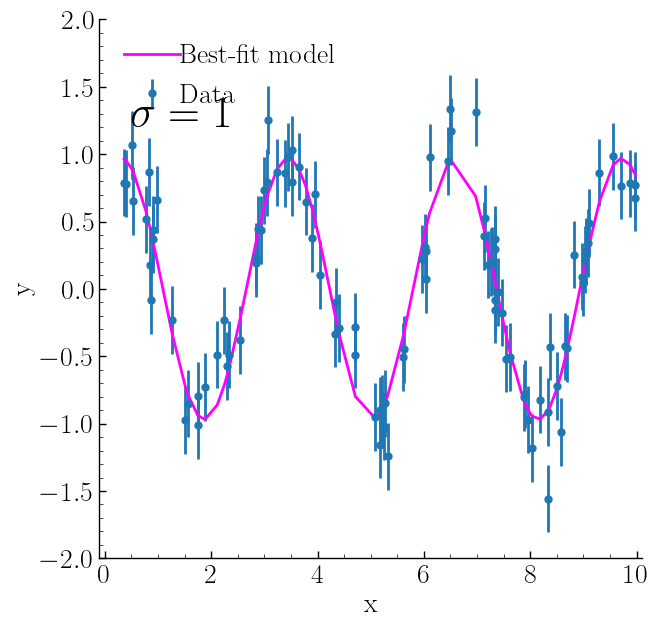

In [28]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f, ax = plt.subplots(1,1, figsize=(7,7))

for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
    
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
    
ax.errorbar(x,y,y_err,fmt='o',label='Data')

ax.plot(x_model, y_model, color='magenta', label='Best-fit model')

ax.set_xlim([-0.1,10.1])
ax.set_ylim([-2.,2])

ax.text(0.5,1.2,r'$\sigma = 1$', color='0', fontsize=32)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

plt.legend(frameon=False,fontsize=20,handletextpad=0)

In [29]:
idx_model = np.argsort(x)
y_data = y[idx_model]
y_model = sinusoid(x[idx_model], A_fit, f_fit, p_fit)

residuals = y_data - y_model
residuals = residuals.numpy()

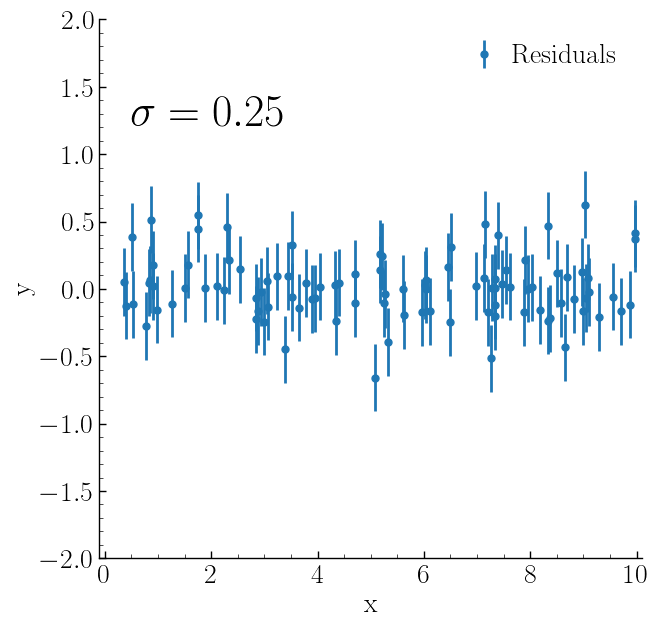

In [31]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f, ax = plt.subplots(1,1, figsize=(7,7))

for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
    
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
    
ax.errorbar(x,residuals,y_err,fmt='o',label='Residuals')

ax.set_xlim([-0.1,10.1])
ax.set_ylim([-2.,2])

ax.text(0.5,1.2,r'$\sigma = 0.25$', color='0', fontsize=32)

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)

plt.legend(frameon=False,fontsize=20,handletextpad=0)